## Decision Tree Classifiers

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics, tree

In [3]:
# dataset for train and validation
# ready-to-use dataset: scalled + drop val(artist, id, name, release_date)
train_and_validation = pd.read_csv('spotify_train.csv', index_col=0)
# test set for 0 popularity
test = pd.read_csv('spotify_test.csv')

In [4]:
print(train_and_validation.shape)
train_and_validation.head()

(133484, 15)


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,popularity
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,0.0936,149.976,0.6340,1920,q1
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,0.0534,86.889,0.9500,1920,q1
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,0.1740,97.600,0.6890,1920,q1
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,0.0425,127.997,0.0422,1920,q1
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,0.0768,122.076,0.2990,1920,q1


In [5]:
X = train_and_validation.drop('popularity', axis=1)
y = train_and_validation['popularity']

In [6]:
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)
y.value_counts()
# 4 classes with severe imbalances q4

X.shape:  (133484, 14)
y.shape:  (133484,)


q2    57502
q1    46510
q3    23558
q4     5914
Name: popularity, dtype: int64

## Experiment plan: 
#### (1) Default setting 
#### (2) Gridsearch
#### (3) Default model with resampled data
#### (4) New gridsearch with resampled data

## (1) Default model

In [9]:
# Import DecisionTreeClassifier and its metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import recall_score, balanced_accuracy_score, f1_score, precision_score, accuracy_score

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=2020)

In [11]:
# Multiclass classification: q1, q2, q3, q4

# Initiate Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=2020)
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for train set
y_pred_train1 = clf.predict(X_train)

print("Train set")
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train1))
print("Balanced Accuracy: ", balanced_accuracy_score(y_train, y_pred_train1))
print("--------------------------------------")

#Predict the response for validation set
y_pred_val1 = clf.predict(X_val)

print("Validation set")
print("Accuracy:", metrics.accuracy_score(y_val, y_pred_val1))
print("Balanced Accuracy: ", balanced_accuracy_score(y_val, y_pred_val1))

Train set
Accuracy: 0.9957725978723859
Balanced Accuracy:  0.9910643905958434
--------------------------------------
Validation set
Accuracy: 0.5893722219447636
Balanced Accuracy:  0.46389838462755434


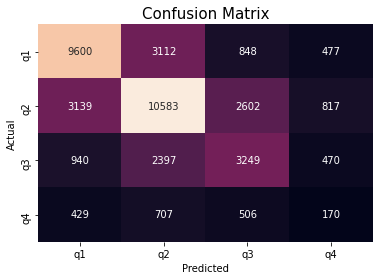

In [12]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_val, columns=y_pred_val1, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [13]:
print(metrics.classification_report(y_val, y_pred_val1))

              precision    recall  f1-score   support

          q1       0.68      0.68      0.68     14037
          q2       0.63      0.62      0.62     17141
          q3       0.45      0.46      0.46      7056
          q4       0.09      0.09      0.09      1812

    accuracy                           0.59     40046
   macro avg       0.46      0.46      0.46     40046
weighted avg       0.59      0.59      0.59     40046



In [ ]:
'''
print("Recall: ", recall_score(y_val, y_pred_val))
#print("Specificity: ", round(1491/(1491+316), 4))
print("Precision Score: ", precision_score(y_val, y_pred_val))
print("Balanced Accuracy: ", balanced_accuracy_score(y_val, y_pred_val))
print("F1 Score: ", f1_score(y_val, y_pred_val))
'''

## (2) Gridsearch model

In [14]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [15]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,6,8,10,12,14],
    'min_samples_split': [8,12,16,20,24,28]
}

# Create a base model
clf = DecisionTreeClassifier(random_state=2020)

# Instantiate the grid search model with cv=10
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1)

# fit the grid with data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2020),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14],
                         'min_samples_split': [8, 12, 16, 20, 24, 28]},
             scoring='balanced_accuracy')

In [16]:
# examine the best model
# Single best score achieved across all params
print("Best balanced_accuracy: ", grid_search.best_score_)

# Dictionary containing the parameters used to generate that score
print("Best Combined Parameters: ", grid_search.best_params_)

Best balanced_accuracy:  0.5225998672608345
Best Combined Parameters:  {'max_depth': 10, 'min_samples_split': 20}


In [17]:
# Train with best hyperparameters
clf_best = DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=2020)
clf_best = clf_best.fit(X_train, y_train)

#Predict the response for train set
y_pred_train2 = clf_best.predict(X_train)

print("Tuned Model on Train set")
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train2))
print("Balanced Accuracy: ", balanced_accuracy_score(y_train, y_pred_train2))
print("--------------------------------------")

#Predict the response for validation set
y_pred_val2 = clf_best.predict(X_val)

print("Tuned model on Validation set")
print("Accuracy:", metrics.accuracy_score(y_val, y_pred_val2))
print("Balanced Accuracy: ", balanced_accuracy_score(y_val, y_pred_val2))

Tuned Model on Train set
Accuracy: 0.7238810762216658
Balanced Accuracy:  0.5393672293365382
--------------------------------------
Tuned model on Validation set
Accuracy: 0.7031913299705339
Balanced Accuracy:  0.5241912087515829


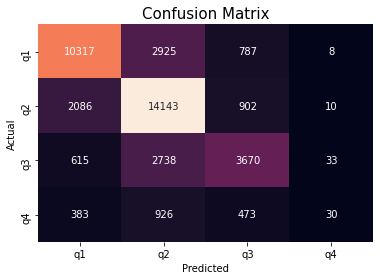

In [18]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_val, columns=y_pred_val2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [19]:
print(metrics.classification_report(y_val, y_pred_val2))

              precision    recall  f1-score   support

          q1       0.77      0.73      0.75     14037
          q2       0.68      0.83      0.75     17141
          q3       0.63      0.52      0.57      7056
          q4       0.37      0.02      0.03      1812

    accuracy                           0.70     40046
   macro avg       0.61      0.52      0.53     40046
weighted avg       0.69      0.70      0.69     40046



### Summarized table between the default model and tuned model

In [20]:
# importing the modules 
from tabulate import tabulate 
print("Accuracy")
# creating a DataFrame 
dict = {'Model':['Train', 'Validation'], 
        'Default Model':[metrics.accuracy_score(y_train, y_pred_train1), metrics.accuracy_score(y_val, y_pred_val1)],
        'Tuned Model':[metrics.accuracy_score(y_train, y_pred_train2), metrics.accuracy_score(y_val, y_pred_val2)]
        }
df = pd.DataFrame(dict) 
  
# displaying the DataFrame 
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

print("Balanced Accuracy")
# creating a DataFrame 
dict = {'Model':['Train', 'Validation'], 
        'Default Model':[balanced_accuracy_score(y_train, y_pred_train1), balanced_accuracy_score(y_val, y_pred_val1)],
        'Tuned Model':[balanced_accuracy_score(y_train, y_pred_train2), balanced_accuracy_score(y_val, y_pred_val2)]
        }
df = pd.DataFrame(dict) 
  
# displaying the DataFrame 
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

Accuracy
+----+------------+-----------------+---------------+
|    | Model      |   Default Model |   Tuned Model |
|----+------------+-----------------+---------------|
|  0 | Train      |        0.995773 |      0.723881 |
|  1 | Validation |        0.589372 |      0.703191 |
+----+------------+-----------------+---------------+
Balanced Accuracy
+----+------------+-----------------+---------------+
|    | Model      |   Default Model |   Tuned Model |
|----+------------+-----------------+---------------|
|  0 | Train      |        0.991064 |      0.539367 |
|  1 | Validation |        0.463898 |      0.524191 |
+----+------------+-----------------+---------------+


## (3) Default model with resampled data

In [21]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [22]:
# this technique seems exxagerate to real world but can consider SMOTE or other more efficient resampling
ros = RandomOverSampler(random_state=2020)

# fit predictor and target variable 
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'q2': 57502, 'q1': 46510, 'q3': 23558, 'q4': 5914})
Resample dataset shape Counter({'q1': 57502, 'q2': 57502, 'q4': 57502, 'q3': 57502})


In [23]:
X_ros_train, X_ros_val, y_ros_train, y_ros_val = train_test_split(X_ros, y_ros, test_size=0.30, random_state=2020)

In [25]:
# Default Decision Tree
clf_ros = DecisionTreeClassifier(random_state=2020)
clf_ros = clf_ros.fit(X_ros_train, y_ros_train)
#Predict the response for train set
y_pred_train4 = clf_ros.predict(X_ros_train)

print("Default Model on resampled Train set")
print("Accuracy:", metrics.accuracy_score(y_ros_train, y_pred_train4))
print("Balanced Accuracy: ", balanced_accuracy_score(y_ros_train, y_pred_train4))
print("--------------------------------------")

#Predict the response for validation set
y_pred_val4 = clf_ros.predict(X_ros_val)

print("Default model on resampled Validation set")
print("Accuracy:", metrics.accuracy_score(y_ros_val, y_pred_val4))
print("Balanced Accuracy: ", balanced_accuracy_score(y_ros_val, y_pred_val4))

Default Model on resampled Train set
Accuracy: 0.9967702866370609
Balanced Accuracy:  0.9967648230034952
--------------------------------------
Default model on resampled Validation set
Accuracy: 0.805066446386389
Balanced Accuracy:  0.806088752480949


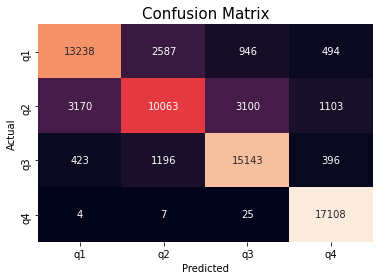

In [26]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_ros_val, columns=y_pred_val4, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [27]:
print(metrics.classification_report(y_ros_val, y_pred_val4))

              precision    recall  f1-score   support

          q1       0.79      0.77      0.78     17265
          q2       0.73      0.58      0.64     17436
          q3       0.79      0.88      0.83     17158
          q4       0.90      1.00      0.94     17144

    accuracy                           0.81     69003
   macro avg       0.80      0.81      0.80     69003
weighted avg       0.80      0.81      0.80     69003



## (4) Gridesearch model with resampled data

In [28]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,6,8,10,12,14],
    'min_samples_split': [8,12,16,20,24,28]
}

# Create a based model
clf = DecisionTreeClassifier(random_state=2020)

# Instantiate the grid search model
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1)

# fit the grid with data
grid_search.fit(X_ros_train, y_ros_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2020),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14],
                         'min_samples_split': [8, 12, 16, 20, 24, 28]},
             scoring='balanced_accuracy')

In [29]:
# examine the best model
# Single best score achieved across all params
print("Best balanced_accuracy: ", grid_search.best_score_)

# Dictionary containing the parameters used to generate that score
print("Best Combined Parameters: ", grid_search.best_params_)

Best balanced_accuracy:  0.6199015921224207
Best Combined Parameters:  {'max_depth': 14, 'min_samples_split': 8}


In [30]:
# Tuned Decision Tree
clf_ros = DecisionTreeClassifier(max_depth=14, min_samples_split=8, random_state=2020)
clf_ros = clf_ros.fit(X_ros_train, y_ros_train)
#Predict the response for train set
y_pred_train5 = clf_ros.predict(X_ros_train)

print("Tuned Model on resampled Train set")
print("Accuracy:", metrics.accuracy_score(y_ros_train, y_pred_train5))
print("Balanced Accuracy: ", balanced_accuracy_score(y_ros_train, y_pred_train5))
print("--------------------------------------")

#Predict the response for validation set
y_pred_val5 = clf_ros.predict(X_ros_val)

print("Tuned model on resampled Validation set")
print("Accuracy:", metrics.accuracy_score(y_ros_val, y_pred_val5))
print("Balanced Accuracy: ", balanced_accuracy_score(y_ros_val, y_pred_val5))

Tuned Model on resampled Train set
Accuracy: 0.6653520077016242
Balanced Accuracy:  0.6655049439783803
--------------------------------------
Tuned model on resampled Validation set
Accuracy: 0.6226975638740344
Balanced Accuracy:  0.6224474223284273


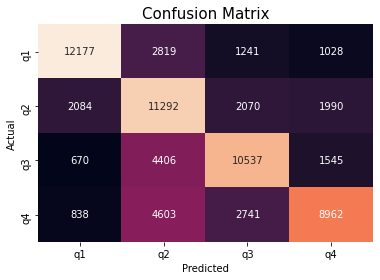

In [31]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_ros_val, columns=y_pred_val5, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [32]:
print(metrics.classification_report(y_ros_val, y_pred_val5))

              precision    recall  f1-score   support

          q1       0.77      0.71      0.74     17265
          q2       0.49      0.65      0.56     17436
          q3       0.64      0.61      0.62     17158
          q4       0.66      0.52      0.58     17144

    accuracy                           0.62     69003
   macro avg       0.64      0.62      0.63     69003
weighted avg       0.64      0.62      0.63     69003



## Summarized Table for 4 models

In [74]:
# importing the modules 
from tabulate import tabulate 
print("Accuracy")
# creating a DataFrame 
dict = {'Data':['Train', 'Validation'], 
        'Base Model':[metrics.accuracy_score(y_train, y_pred_train1), metrics.accuracy_score(y_val, y_pred_val1)],
        'Gridsearch Model':[metrics.accuracy_score(y_train, y_pred_train2), metrics.accuracy_score(y_val, y_pred_val2)],
        'Base + Oversampling':[metrics.accuracy_score(y_ros_train, y_pred_train4), metrics.accuracy_score(y_ros_val, y_pred_val4)],
        'Gridsearch + Oversampling':[metrics.accuracy_score(y_ros_train, y_pred_train5), metrics.accuracy_score(y_ros_val, y_pred_val5)]
        }
df = pd.DataFrame(dict) 
  
# displaying the DataFrame 
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

print("Balanced Accuracy")
# creating a DataFrame 
dict = {'Data':['Train', 'Validation'], 
        'Base Model':[balanced_accuracy_score(y_train, y_pred_train1), balanced_accuracy_score(y_val, y_pred_val1)],
        'Gridseach Model':[balanced_accuracy_score(y_train, y_pred_train2), balanced_accuracy_score(y_val, y_pred_val2)],
        'Base + Oversampling':[balanced_accuracy_score(y_ros_train, y_pred_train4), balanced_accuracy_score(y_ros_val, y_pred_val4)],
        'Gridsearch + Oversampling':[balanced_accuracy_score(y_ros_train, y_pred_train5), balanced_accuracy_score(y_ros_val, y_pred_val5)]
        }
df = pd.DataFrame(dict) 
  
# displaying the DataFrame 
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

Accuracy
+----+------------+--------------+--------------------+-----------------------+-----------------------------+
|    | Data       |   Base Model |   Gridsearch Model |   Base + Oversampling |   Gridsearch + Oversampling |
|----+------------+--------------+--------------------+-----------------------+-----------------------------|
|  0 | Train      |     0.995773 |           0.723881 |              0.99677  |                    0.665352 |
|  1 | Validation |     0.589372 |           0.703191 |              0.805066 |                    0.622698 |
+----+------------+--------------+--------------------+-----------------------+-----------------------------+
Balanced Accuracy
+----+------------+--------------+-------------------+-----------------------+-----------------------------+
|    | Data       |   Base Model |   Gridseach Model |   Base + Oversampling |   Gridsearch + Oversampling |
|----+------------+--------------+-------------------+-----------------------+-----------------

## Highest accuracy model: Default + Resampling with 80%
## Best generalized model: Gridsearch + Resampling with < 0.1 gap

## (5) Optional: SMOTE

In [36]:
df = train_and_validation
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,popularity
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,0.0936,149.976,0.6340,1920,q1
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,0.0534,86.889,0.9500,1920,q1
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,0.1740,97.600,0.6890,1920,q1
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,0.0425,127.997,0.0422,1920,q1
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,0.0768,122.076,0.2990,1920,q1


In [2]:
#pip install imblearn

In [37]:
X = train_and_validation.drop('popularity', axis=1)
y = train_and_validation['popularity']

In [38]:
print('Before OverSampling, the shape of train_X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y.shape))

print("Before OverSampling, counts of label 'q1': {}".format(sum(y == 'q1'))) 
print("Before OverSampling, counts of label 'q2': {}".format(sum(y == 'q2'))) 
print("Before OverSampling, counts of label 'q3': {}".format(sum(y == 'q3'))) 
print("Before OverSampling, counts of label 'q4': {}".format(sum(y == 'q4'))) 

Before OverSampling, the shape of train_X: (133484, 14)
Before OverSampling, the shape of train_y: (133484,) 

Before OverSampling, counts of label 'q1': 46510
Before OverSampling, counts of label 'q2': 57502
Before OverSampling, counts of label 'q3': 23558
Before OverSampling, counts of label 'q4': 5914


In [39]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_res, y_res = sm.fit_sample(X, y)

In [40]:
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_res, y_res, test_size=0.30, random_state=2020)

In [41]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label 'q1': {}".format(sum(y_train_res == 'q1'))) 
print("After OverSampling, counts of label 'q2': {}".format(sum(y_train_res == 'q2'))) 
print("After OverSampling, counts of label 'q3': {}".format(sum(y_train_res == 'q3'))) 
print("After OverSampling, counts of label 'q4': {}".format(sum(y_train_res == 'q4'))) 

After OverSampling, the shape of train_X: (161005, 14)
After OverSampling, the shape of train_y: (161005,) 

After OverSampling, counts of label 'q1': 40237
After OverSampling, counts of label 'q2': 40066
After OverSampling, counts of label 'q3': 40344
After OverSampling, counts of label 'q4': 40358


In [42]:
print('After OverSampling, the shape of val_X: {}'.format(X_val_res.shape)) 
print('After OverSampling, the shape of val_y: {} \n'.format(y_val_res.shape)) 

print("After OverSampling, counts of label 'q1': {}".format(sum(y_val_res == 'q1'))) 
print("After OverSampling, counts of label 'q2': {}".format(sum(y_val_res == 'q2'))) 
print("After OverSampling, counts of label 'q3': {}".format(sum(y_val_res == 'q3'))) 
print("After OverSampling, counts of label 'q4': {}".format(sum(y_val_res == 'q4'))) 

After OverSampling, the shape of val_X: (69003, 14)
After OverSampling, the shape of val_y: (69003,) 

After OverSampling, counts of label 'q1': 17265
After OverSampling, counts of label 'q2': 17436
After OverSampling, counts of label 'q3': 17158
After OverSampling, counts of label 'q4': 17144


In [43]:
# Default Decision Tree
clf_res = DecisionTreeClassifier(random_state=2020)
clf_res = clf_res.fit(X_train_res, y_train_res)
#Predict the response for train set
y_pred_train6 = clf_res.predict(X_train_res)

print("Default Model with SMOTE on Train set")
print("Accuracy:", metrics.accuracy_score(y_train_res, y_pred_train6))
print("Balanced Accuracy: ", balanced_accuracy_score(y_train_res, y_pred_train6))
print("--------------------------------------")

#Predict the response for validation set
y_pred_val6 = clf_res.predict(X_val_res)

print("Default model with SMOTE on Validation set")
print("Accuracy:", metrics.accuracy_score(y_val_res, y_pred_val6))
print("Balanced Accuracy: ", balanced_accuracy_score(y_val_res, y_pred_val6))

Default Model with SMOTE on Train set
Accuracy: 0.9978013105183069
Balanced Accuracy:  0.9978015883863347
--------------------------------------
Default model with SMOTE on Validation set
Accuracy: 0.5684680376215527
Balanced Accuracy:  0.5686800919919208


In [44]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,6,8,10,12,14],
    'min_samples_split': [20,24,28,32,36,40]
}

# Create a based model
clf = DecisionTreeClassifier(random_state=2020)

# Instantiate the grid search model
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# fit the grid with data
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2020),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14],
                         'min_samples_split': [20, 24, 28, 32, 36, 40]},
             scoring='accuracy')

In [45]:
# examine the best model
# Single best score achieved across all params
print("Best balanced accuracy: ", grid_search.best_score_)

# Dictionary containing the parameters used to generate that score
print("Best Combined Parameters: ", grid_search.best_params_)

Best balanced accuracy:  0.5798764549557317
Best Combined Parameters:  {'max_depth': 14, 'min_samples_split': 40}


In [46]:
# Tuned Decision Tree
clf_res = DecisionTreeClassifier(max_depth=14, min_samples_split=28, random_state=2020)
clf_res = clf_res.fit(X_train_res, y_train_res)
#Predict the response for train set
y_pred_train7 = clf_res.predict(X_train_res)

print("Tuned Model on SMOTE Train set")
print("Accuracy:", metrics.accuracy_score(y_train_res, y_pred_train7))
print("Balanced Accuracy: ", balanced_accuracy_score(y_train_res, y_pred_train7))
print("--------------------------------------")

#Predict the response for validation set
y_pred_val7 = clf_res.predict(X_val_res)

print("Tuned model on SMOTE Validation set")
print("Accuracy:", metrics.accuracy_score(y_val_res, y_pred_val7))
print("Balanced Accuracy: ", balanced_accuracy_score(y_val_res, y_pred_val7))

Tuned Model on SMOTE Train set
Accuracy: 0.637334244278128
Balanced Accuracy:  0.6373921190881946
--------------------------------------
Tuned model on SMOTE Validation set
Accuracy: 0.576569134675304
Balanced Accuracy:  0.5765315814213687


#### Models with SMOTE did not show any significant improvement on accuracy and generalizarion 

## (6) Optional: Feature Selection

In [48]:
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot

Feature: 0, Score: 0.06106
Feature: 1, Score: 0.05815
Feature: 2, Score: 0.06916
Feature: 3, Score: 0.05685
Feature: 4, Score: 0.00538
Feature: 5, Score: 0.06235
Feature: 6, Score: 0.02806
Feature: 7, Score: 0.06249
Feature: 8, Score: 0.06544
Feature: 9, Score: 0.00643
Feature: 10, Score: 0.05988
Feature: 11, Score: 0.06365
Feature: 12, Score: 0.05940
Feature: 13, Score: 0.34172
-------------------------------------------
Graph showing the degree of impotance


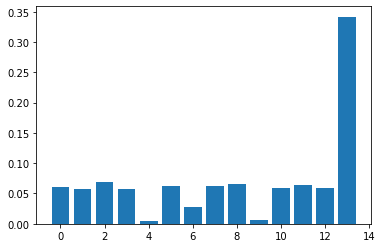

In [49]:
# Feature importance using decision tree as base
clf_im = DecisionTreeClassifier(random_state=2020)
# fit the model
clf_im = clf_im.fit(X_train, y_train)

# get importance
importance = clf_im.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
print("-------------------------------------------")
print("Graph showing the degree of impotance")
pyplot.show()

In [69]:
# feature selection function
def select_features(X_train, y_train, X_val):
    # configure to select a subset of features
    fs = SelectFromModel(DecisionTreeClassifier(), max_features=11)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_val_fs = fs.transform(X_val)
    return X_train_fs, X_val_fs, fs

In [51]:
# split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=2020)

# feature selection
X_train_fs, X_val_fs, fs = select_features(X_train, y_train, X_val)

In [53]:
# fit the default model
clf_fs = DecisionTreeClassifier(random_state=2020)
clf_fs = clf_fs.fit(X_train_fs, y_train)
#Predict the response for train set
y_pred_train3 = clf_fs.predict(X_train_fs)

print("Default Model on selectd featured - Train set")
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train3))
print("Balanced Accuracy: ", balanced_accuracy_score(y_train, y_pred_train3))
print("--------------------------------------")

#Predict the response for validation set
y_pred_val3 = clf_fs.predict(X_val_fs)

print("Default model on selectd featured - Validation set")
print("Accuracy:", metrics.accuracy_score(y_val, y_pred_val3))
print("Balanced Accuracy: ", balanced_accuracy_score(y_val, y_pred_val3))

Default Model on selectd featured - Train set
Accuracy: 0.6844003510349108
Balanced Accuracy:  0.5054590451501799
--------------------------------------
Default model on selectd featured - Validation set
Accuracy: 0.6813913998901263
Balanced Accuracy:  0.5057249989962223


In [54]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12,14,16,18],
    'min_samples_split': [12,14,16,18,20]
}

# Create a based model
clf_fs = DecisionTreeClassifier(random_state=2020)

# Instantiate the grid search model
grid_search = GridSearchCV(clf_fs, param_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1)

# fit the grid with data
grid_search.fit(X_train_fs, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2020),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14, 16, 18],
                         'min_samples_split': [12, 14, 16, 18, 20]},
             scoring='balanced_accuracy')

In [55]:
# examine the best model
# Single best score achieved across all params
print("Best balanced_accuracy: ", grid_search.best_score_)

# Dictionary containing the parameters used to generate that score
print("Best Combined Parameters: ", grid_search.best_params_)

Best balanced_accuracy:  0.5049448746488598
Best Combined Parameters:  {'max_depth': 8, 'min_samples_split': 12}


In [56]:
# fit the tuned model
clf_fs_best = DecisionTreeClassifier(max_depth=8, min_samples_split=12, random_state=2020)
clf_fs_best = clf_fs_best.fit(X_train_fs, y_train)
#Predict the response for train set
y_pred_train8 = clf_fs_best.predict(X_train_fs)

print("Tuned Model on Train set")
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train8))
print("Balanced Accuracy: ", balanced_accuracy_score(y_train, y_pred_train8))
print("--------------------------------------")

#Predict the response for validation set
y_pred_val8 = clf_fs_best.predict(X_val_fs)

print("Tuned model on Validation set")
print("Accuracy:", metrics.accuracy_score(y_val, y_pred_val8))
print("Balanced Accuracy: ", balanced_accuracy_score(y_val, y_pred_val8))

Tuned Model on Train set
Accuracy: 0.6844003510349108
Balanced Accuracy:  0.5054590451501799
--------------------------------------
Tuned model on Validation set
Accuracy: 0.6813913998901263
Balanced Accuracy:  0.5057249989962223


## Research Question

## How would the unpopular songs be possibly remixed based on the audio features in order to get more popular?

In [47]:
df = train_and_validation

In [71]:
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,popularity
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,0.0936,149.976,0.6340,1920,q1
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,0.0534,86.889,0.9500,1920,q1
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,0.1740,97.600,0.6890,1920,q1
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,0.0425,127.997,0.0422,1920,q1
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,0.0768,122.076,0.2990,1920,q1


In [76]:
df2 = df.drop(columns=['duration_ms', 'explicit', 'key', 'mode', 'year'])

In [77]:
df2.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.991000,0.598,0.224,0.000522,0.3790,-12.628,0.0936,149.976,0.6340,q1
1,0.643000,0.852,0.517,0.026400,0.0809,-7.261,0.0534,86.889,0.9500,q1
2,0.993000,0.647,0.186,0.000018,0.5190,-12.098,0.1740,97.600,0.6890,q1
3,0.000173,0.730,0.798,0.801000,0.1280,-7.311,0.0425,127.997,0.0422,q1
4,0.295000,0.704,0.707,0.000246,0.4020,-6.036,0.0768,122.076,0.2990,q1


In [138]:
df_q1 = df2.loc[(df2['popularity'] == 'q1')]
df_q2 = df2.loc[(df2['popularity'] == 'q2')]
df_q3 = df2.loc[(df2['popularity'] == 'q3')]
df_q4 = df2.loc[(df2['popularity'] == 'q4')]

In [83]:
df_q1.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,46510.000000,46510.000000,46510.000000,46510.000000,46510.000000,46510.000000,46510.000000,46510.000000,46510.000000
mean,0.614800,0.507698,0.425602,0.233986,0.227538,-12.808914,0.091462,115.969466,0.511482
std,0.354455,0.166961,0.269823,0.356597,0.198728,5.483405,0.164727,29.873028,0.267355
min,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,0.300000,0.394000,0.202000,0.000002,0.103000,-15.977000,0.035000,92.946750,0.288000
50%,0.752000,0.519000,0.376000,0.001590,0.145000,-12.086000,0.043500,114.723500,0.520000
75%,0.928000,0.630000,0.624000,0.496000,0.290000,-8.815500,0.065000,134.293000,0.733000
max,0.996000,0.985000,1.000000,0.997000,0.999000,0.899000,0.971000,221.058000,0.995000


In [86]:
df_q2.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,57502.000000,57502.000000,57502.000000,57502.000000,57502.000000,57502.000000,57502.000000,57502.000000,57502.000000
mean,0.384852,0.537509,0.545132,0.128539,0.203293,-11.012217,0.067819,119.370295,0.553367
std,0.337232,0.175023,0.258278,0.274792,0.182052,5.060854,0.078573,29.949113,0.265248
min,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,0.052800,0.416000,0.347000,0.000001,0.092600,-13.562000,0.033100,96.481000,0.340000
50%,0.308000,0.546000,0.551000,0.000201,0.130000,-10.281500,0.041600,116.646000,0.569000
75%,0.699000,0.664000,0.758000,0.036175,0.258000,-7.437250,0.063000,137.300750,0.780000
max,0.996000,0.980000,1.000000,0.999000,1.000000,3.744000,0.961000,243.507000,1.000000


In [87]:
df_q3.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,23558.000000,23558.000000,23558.000000,23558.000000,23558.000000,23558.000000,23558.000000,23558.000000,23558.000000
mean,0.280323,0.589586,0.618329,0.063222,0.186045,-8.210848,0.083213,120.635929,0.525486
std,0.297065,0.168365,0.228338,0.200582,0.151489,4.487805,0.091121,30.097619,0.252223
min,0.000000,0.000000,0.000020,0.000000,0.000000,-54.376000,0.000000,0.000000,0.000000
25%,0.028700,0.483000,0.468000,0.000000,0.093400,-10.052000,0.033700,96.428250,0.326000
50%,0.160000,0.599000,0.646000,0.000007,0.125000,-7.149000,0.045350,119.725000,0.527000
75%,0.477000,0.711000,0.801000,0.001430,0.237000,-5.218000,0.084000,140.004000,0.732000
max,0.996000,0.988000,1.000000,1.000000,0.996000,1.342000,0.944000,219.446000,0.991000


In [88]:
df_q4.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000
mean,0.367480,0.565628,0.560180,0.093767,0.202097,-9.848326,0.075257,119.123968,0.534339
std,0.329921,0.171142,0.243281,0.239781,0.177626,4.948404,0.089544,30.052495,0.255415
min,0.000001,0.000000,0.000020,0.000000,0.019500,-42.238000,0.000000,0.000000,0.000000
25%,0.053325,0.451250,0.383250,0.000000,0.095700,-12.484500,0.033600,95.710250,0.330000
50%,0.267500,0.576000,0.578000,0.000033,0.131000,-8.993500,0.044200,116.965500,0.541000
75%,0.666000,0.689000,0.755000,0.006468,0.254000,-6.150000,0.071200,137.832750,0.742000
max,0.996000,0.980000,0.996000,1.000000,0.991000,0.289000,0.964000,220.099000,0.990000


In [174]:
def bar_plot(valuesList, name):
    
    # create a dataset
    height = valuesList
    bars = ('q1', 'q2', 'q3', 'q4')
    x_pos = np.arange(len(bars))
    
    # plt.figure(figsize=(4,2), dpi=100)
    
    # Create bars
    plt.bar(x_pos, height, color=('black', 'red', 'green', 'blue'))
    
    # varianle name
    plt.title(name)
    
    # Create names on the x-axis
    plt.xticks(x_pos, bars)

    # Show graph
    plt.show()

In [149]:
acoust = [df_q1['acousticness'].mean(), df_q2['acousticness'].mean(), df_q3['acousticness'].mean(), df_q4['acousticness'].mean()]
dance = [df_q1['danceability'].mean(), df_q2['danceability'].mean(), df_q3['danceability'].mean(), df_q4['danceability'].mean()]
energy = [df_q1['energy'].mean(), df_q2['energy'].mean(), df_q3['energy'].mean(), df_q4['energy'].mean()]
ins = [df_q1['instrumentalness'].mean(), df_q2['instrumentalness'].mean(), df_q3['instrumentalness'].mean(), df_q4['instrumentalness'].mean()]
live = [df_q1['liveness'].mean(), df_q2['liveness'].mean(), df_q3['liveness'].mean(), df_q4['liveness'].mean()]
loud = [df_q1['loudness'].mean(), df_q2['loudness'].mean(), df_q3['loudness'].mean(), df_q4['loudness'].mean()]
speech = [df_q1['speechiness'].mean(), df_q2['speechiness'].mean(), df_q3['speechiness'].mean(), df_q4['speechiness'].mean()]
tempo = [df_q1['tempo'].mean(), df_q2['tempo'].mean(), df_q3['tempo'].mean(), df_q4['tempo'].mean()]
valence = [df_q1['valence'].mean(), df_q2['valence'].mean(), df_q3['valence'].mean(), df_q4['valence'].mean()]


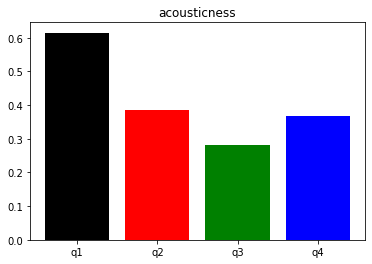

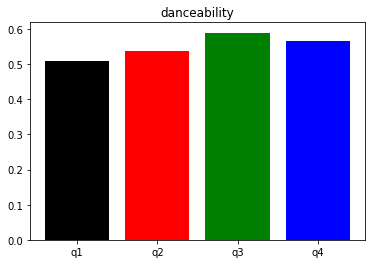

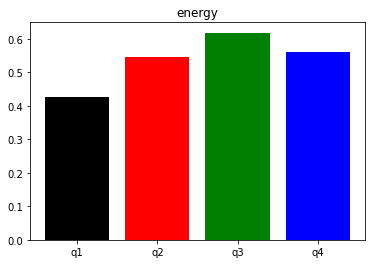

In [182]:
bar_plot(ac, 'acousticness')
bar_plot(dance, 'danceability')
bar_plot(energy, 'energy')

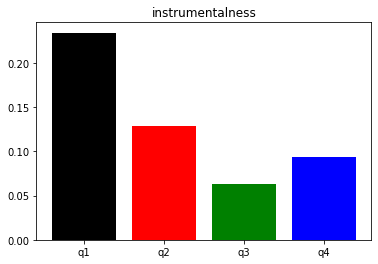

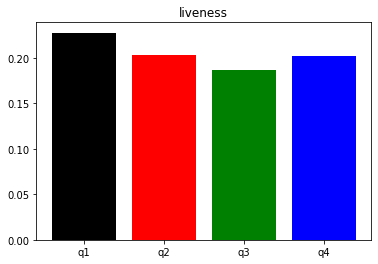

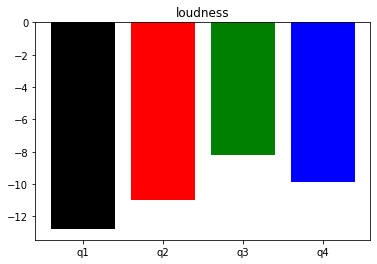

In [183]:
bar_plot(ins, 'instrumentalness')
bar_plot(live, 'liveness')
bar_plot(loud, 'loudness')

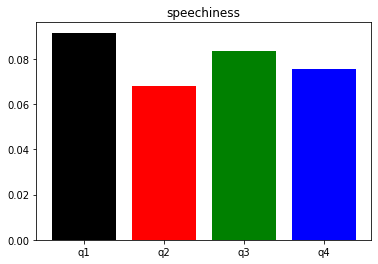

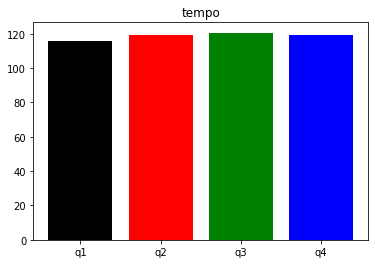

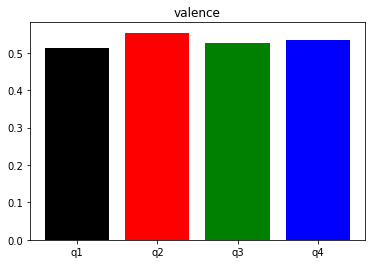

In [184]:
bar_plot(speech, 'speechiness')
bar_plot(tempo, 'tempo')
bar_plot(valence, 'valence')

#### Not much difference on dancability, tempo, valence
#### So, from 9 audio features, considering only 6 features

In [200]:
acoust1 = [df_q2['acousticness'].mean(), df_q3['acousticness'].mean(), df_q4['acousticness'].mean()]
energy1 = [df_q2['energy'].mean(), df_q3['energy'].mean(), df_q4['energy'].mean()]
ins1 = [df_q2['instrumentalness'].mean(), df_q3['instrumentalness'].mean(), df_q4['instrumentalness'].mean()]
live1 = [df_q2['liveness'].mean(), df_q3['liveness'].mean(), df_q4['liveness'].mean()]
loud1 = [df_q2['loudness'].mean(), df_q3['loudness'].mean(), df_q4['loudness'].mean()]
speech1 = [df_q2['speechiness'].mean(), df_q3['speechiness'].mean(), df_q4['speechiness'].mean()]

In [204]:
from tabulate import tabulate 
# creating a DataFrame 
print("Summarized table")
dict = {'Variable':['acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness'], 
        'Unpopular Mean Scale':[df_q1['acousticness'].mean(), df_q1['energy'].mean(),
                          df_q1['instrumentalness'].mean(), df_q1['liveness'].mean(),
                          df_q1['loudness'].mean(), df_q1['speechiness'].mean()],
        'Recommended Min Scale':[min(acoust1), min(energy1), min(ins1), min(live1), min(loud1), min(speech1)],
        'Recommended Max Scale':[max(acoust1), max(energy1), max(ins1), max(live1), max(loud1), max(speech1)],
        }
df = pd.DataFrame(dict) 
  
# displaying the DataFrame 
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

Summarized table
+----+------------------+------------------------+-------------------------+-------------------------+
|    | Variable         |   Unpopular Mean Scale |   Recommended Min Scale |   Recommended Max Scale |
|----+------------------+------------------------+-------------------------+-------------------------|
|  0 | acousticness     |              0.6148    |               0.280323  |               0.384852  |
|  1 | energy           |              0.425602  |               0.545132  |               0.618329  |
|  2 | instrumentalness |              0.233986  |               0.0632217 |               0.128539  |
|  3 | liveness         |              0.227538  |               0.186045  |               0.203293  |
|  4 | loudness         |            -12.8089    |             -11.0122    |              -8.21085   |
|  5 | speechiness      |              0.0914623 |               0.0678186 |               0.0832132 |
+----+------------------+------------------------+------